In [3]:
import dm_den_viz
import dm_den
import paths
import cropper
import fitting
import lmfit
import pickle
import staudt_utils
import numpy as np
import pandas as pd
from importlib import reload
from IPython.display import display, Latex
from astropy import units as u, constants as c

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['axes.labelsize']=15.
rcParams['xtick.labelsize'] = 12.
rcParams['ytick.labelsize'] = 12.
rcParams['figure.dpi'] = 110.
rcParams['legend.fontsize'] = 15.

mls = 11. #marker label size
#result_figsize = (4.5,3.5) #figure size for the main result plots (rho & sigma)
result_figsize = (4.5,4.8) #figure size for the main result plots (rho & sigma)

In [5]:
with open(paths.data + 'data_raw.pkl', 'rb') as f:
    results_sigmoid_damped = pickle.load(f)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

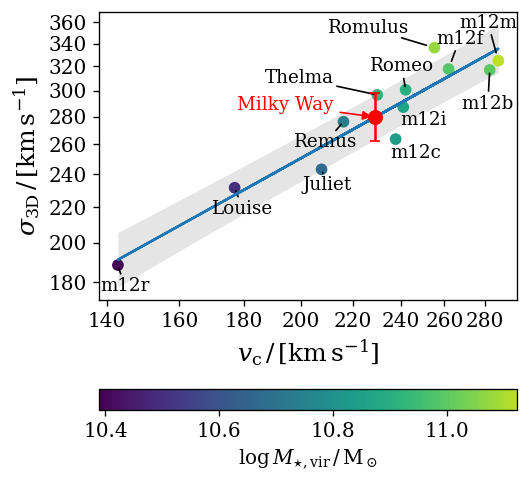

[array([[279.57467057]]), [array([18.79008946, 17.60674776])]]

In [15]:
reload(dm_den_viz)
dm_den_viz.plt_vs_vc('disp_dm_disc_cyl', 
                     source_fname = 'dm_stats_dz1.0_20230626.h5',
                     tgt_fname='disp_vs_vphi.png',
                     update_val=True,
                     figsize=result_figsize, labelsize=mls, 
                     adjust_text_kwargs={'force_static': (0.3, 3.),
                                         'force_text': (0.4, 0.4),
                                         #'force_explode': (0.09, 0.03)
                                        },
                     label_overrides={'Romulus': (2.1, 350., True),
                                      'm12m': (2.67, 355., True),
                                      'm12f': (2.56, 340., True)
                                     },
                     dpi_show=120, 
                     xtickspace=0.2, 
                     ytickspace=20.,
                     verbose=False, beta_sig=1.-0.682, 
                     color='masses',
                    )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

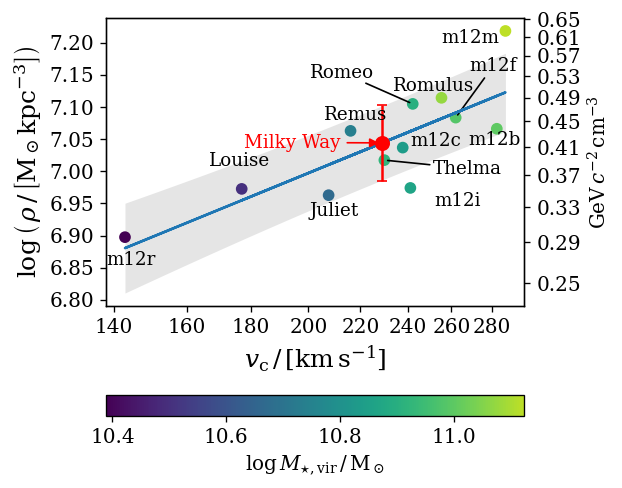

In [17]:
reload(dm_den_viz)
rho_hat = dm_den_viz.plt_vs_vc('den_disc',
                               source_fname = 'dm_stats_dz1.0_20230626.h5',
                               tgt_fname='den_vs_vphi.png',
                               update_val=True,
                               adjust_text_kwargs={'force_static': (0.8, 3.),
                                                   'force_text': (0.6, 0.6),
                                                   'force_explode': (0.1, 0.08),
                                                   'min_arrow_len': 35.
                                                  },
                               label_overrides={'m12m': (2.55, 7.2, False),
                                                'm12c': (2.41, 7.04, False)},
                               figsize=result_figsize, labelsize=mls, 
                               verbose=False,
                               v0=dm_den_viz.vc_eilers,
                               dv0=dm_den_viz.dvc_eilers,
                               dpi_show=120,
                               xtickspace=0.2, beta_sig=1.-0.682, 
                               color='masses')

1.74 kpc arclength bins
0.86% max den diff
1.15% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

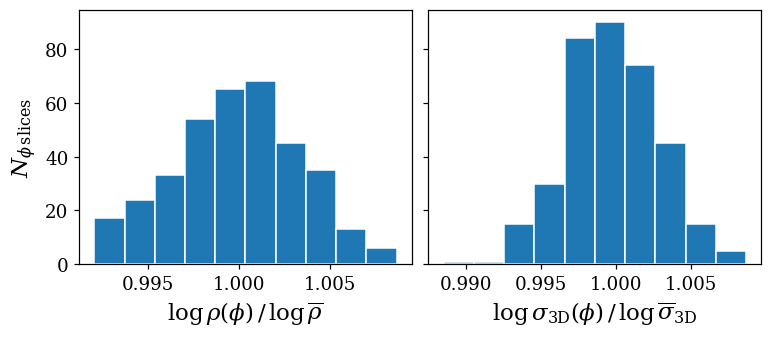

In [49]:
reload(dm_den_viz)
print('{0:0.2f} kpc arclength bins'.format(2.*np.pi*8.3/30.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N30_dz1.0_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname='disc_diffs.png',
                          update_val=True)

<IPython.core.display.Latex object>

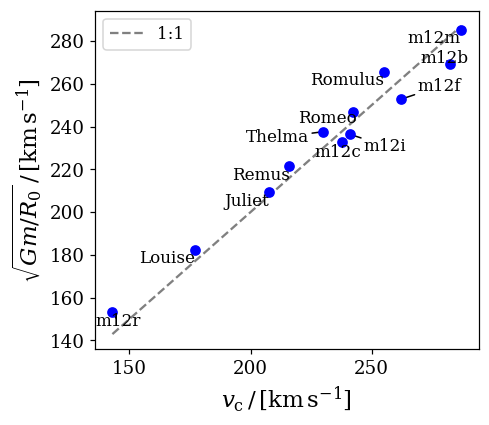

In [47]:
reload(dm_den_viz)
dm_den_viz.plt_gmr_vs_vc(tgt_fname='gmr_vs_vc.png', 
                         figsize=(4.5,4), 
                         adjust_text_kwargs={#'force_static': (.8, .8),
                                             #'force_text': (0.6, 0.6),
                                             #'force_explode': (5., 5.),
                                             #'min_arrow_len': 23.
                                            },
                         #label_overrides={'m12r': (2.15, 2.22, True),
                         #                 'Louise': (2.23, 2.3, True),
                         #                 'Remus': (2.278, 2.34, False),
                         #                 'Juliet': (2.33, 2.3, True),
                         #                 'm12i': (2.39, 2.36, False),
                         #                 'm12f': (2.42, 2.388, False),
                         #                 'm12m': (2.41, 2.46, False)}
                        )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

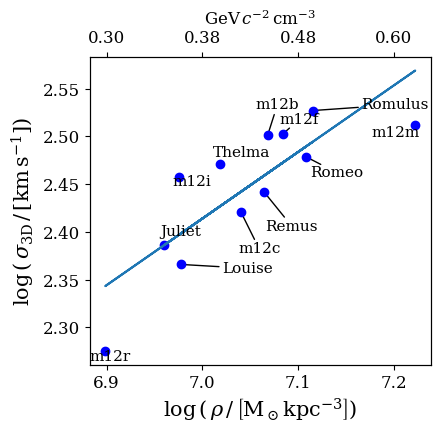

In [7]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   'den_disc', 'disp_dm_disc_cyl',
                   dm_den_viz.den_label, dm_den_viz.disp_label,
                   'log', 'log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'force_static':(1.7, 1.7),
                                       'force_explode':(0.05,0.3),
                                       'min_arrow_len':10.},
                   labelsize=mls, show_formula='outside',
                   tgt_fname='disp_vs_den.png',
                   #ax_slr_kwargs={'prediction_x':[[dm_den_viz.rho_sofu],
                   #                               10.**rho_hat[0][0]],
                   #               'dX':[[dm_den_viz.drho_sofu],
                   #                      rho_hat[1][0] \
                   #                      *np.sqrt(10.**(rho_hat[0][0][0]*2.) \
                   #                               * np.log(10.)**2.)]}
                      )
# The extra math on the error bar from my prediction is to get the
# log error bar into a linear error bar that the program will then
# convert back into the original error bar. (The program expects linear
# error bars, even though it might display log error bars in the end.)

#print(_)

In [8]:
df = dm_den.load_data('dm_stats_dz1.0_20230626.h5').drop(['m12w', 'm12z'])
cor_df = df \
    [['disp_dm_disc_cyl',
      'den_disc',
      'v_dot_phihat_disc(T<=1e3)',
      'vcirc']] \
    .rename(columns={'disp_dm_disc_cyl': '$\sigma_\mathrm{3D}$', 
                     'den_disc': '$\rho$',
                     'v_dot_phihat_disc(T<=1e3)': '$v_c$',
                     'vcirc': '$\sqrt{Gm/R_0}$'}) \
    .corr()
for i in range(cor_df.shape[0]):
    for j in range(cor_df.shape[1]):
        if j>i:
            cor_df.iloc[i,j] = ''
caption = 'Correlations between the four variables of interest'
with open(paths.tables+'corr.tex','w') as tf:
    l = cor_df.to_latex(escape=False,
                        float_format='{:0.2f}'.format,
                        caption=caption,
                        label='table:corr')
    tf.write(l)
cor_df

/var/folders/94/r7q1ltfd5cdf55qhtt067d380000gn/T/ipykernel_40766/3455581519.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  l = cor_df.to_latex(escape=False,


,$\sigma_\mathrm{3D}$,$\rho$,$v_c$,$\sqrt{Gm/R_0}$
$\sigma_\mathrm{3D}$,1.000000,,,
$\rho$,0.787835,1.0,,
$v_c$,0.933800,0.787627,1.0,
$\sqrt{Gm/R_0}$,0.964623,0.833963,0.986555,1.0


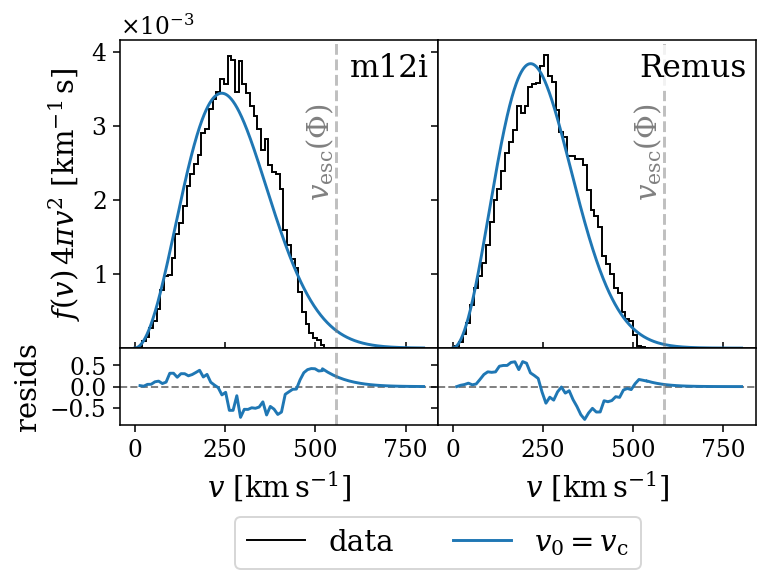

In [17]:
reload(fitting)
fitting.plt_naive(gals=['m12i', 'Remus'],
                  tgt_fname='distribs_from_predicted_sigma.png',
                  show_sigma_vc=False, show_exp=False, show_sigma_meas=False)

100% |####################################################################################################|


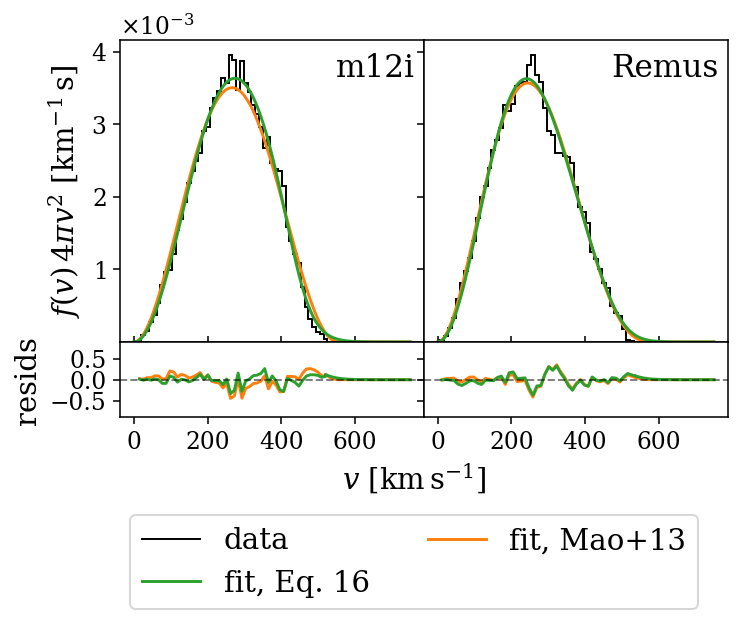

{'m12i': 443.88261456681596, 'Remus': 499.1516802849354}

In [7]:
reload(fitting)
sigmoid_damped_eqnum = 16
fitting.fit_vdamp(gals=['m12i', 'Remus'],
                  tgt_fname='vdamp_fits.png', 
                  show_mao_fixed=True,
                  show_mao_free=False,
                  sigmoid_damped_eqnum=sigmoid_damped_eqnum,
                  xtickspace=200.)

reload(dm_den_viz)
dm_den_viz.plt_universal_prefit(results_sigmoid_damped, ['m12i', 'Remus'],
                                tgt_fname='universal_fits.png')

Using ddfrac = 0.09600
Using dhfrac = 0.05760


100% |############################################################################################|


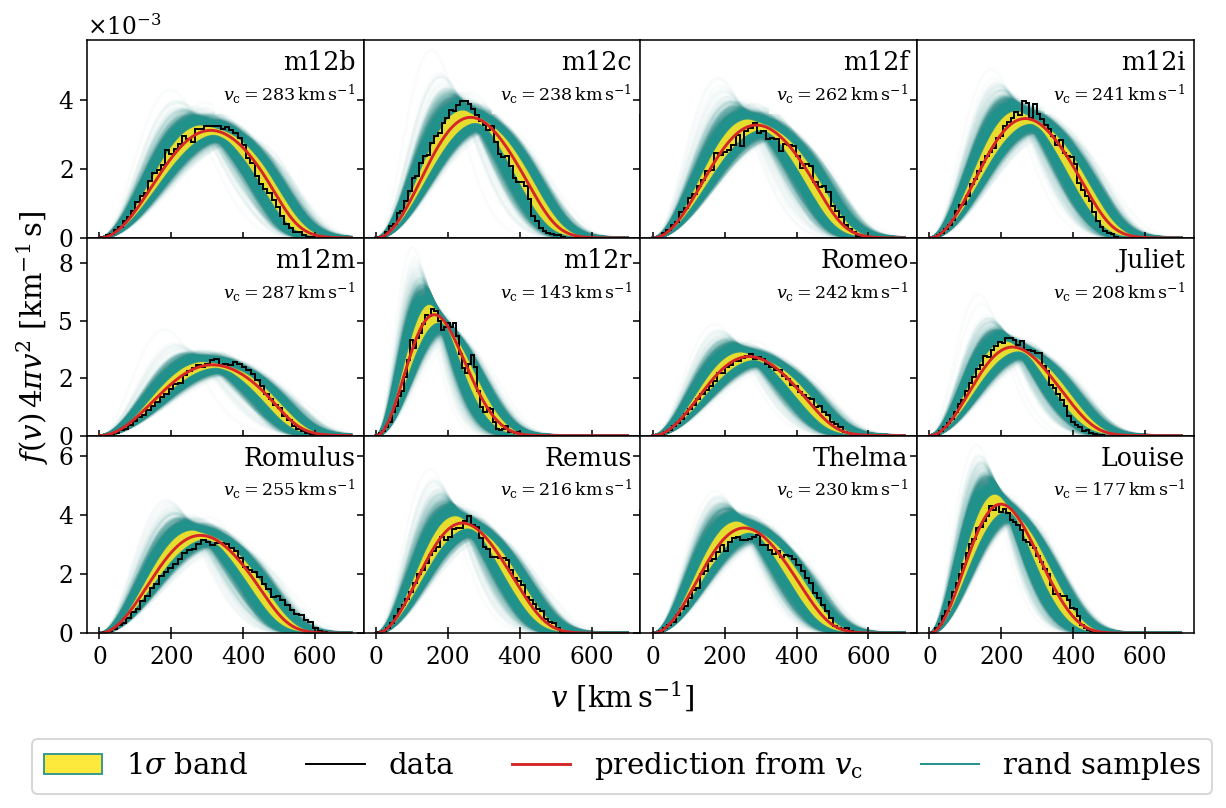

In [161]:
reload(dm_den_viz)
reload(fitting)
dm_den_viz.plt_universal_prefit(results_sigmoid_damped, xtickspace=200.,
                                tgt_fname='univ_fit_all.png')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

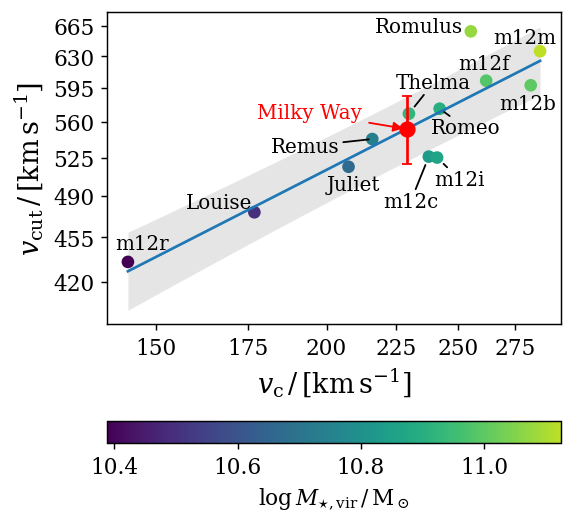

In [97]:
reload(dm_den_viz)
dm_den_viz.plt_vcut_vs_vc('dm_stats_dz1.0_20230724.h5', 
                          tgt_fname='vmax.png',
                          adjust_text_kwargs={'force_static': (0.9, 0.9),
                                              #'force_text': (0.5, 0.5),
                                              'force_explode': (.5, .7),
                                              #'explode_radius': 180,
                                              #'min_arrow_len': 10.,
                                              'force_pull': (0.01, 0.01)
                                             },
                           label_overrides={'Juliet': (200., 495, False),
                                            'm12r': (140., 445., False),
                                            'm12i': (240., 500., True),
                                            'm12c': (220., 480., True),
                                            'Thelma': (225., 595., True),
                                            'm12b': (268., 573., False),
                                            'm12f': (250., 615., False),
                                            'm12m': (265., 645., False),
                                            'Romulus': (217., 658., False)
                                           },
                          formula_y=-1., xtickspace=25., ytickspace=35.,
                          dpi_show=130.,
                          update_values=True, show_formula='outside')

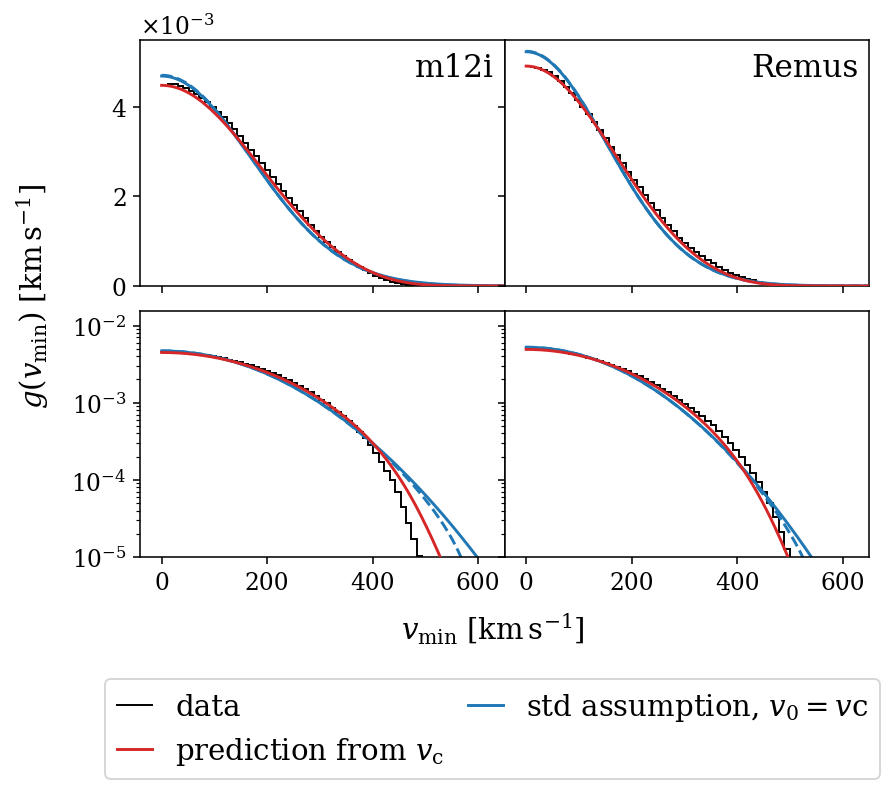

In [32]:
reload(dm_den_viz)
dm_den_viz.plt_halo_integrals_dblscale(['m12i', 'Remus'],
                                       'dm_stats_dz1.0_20230626.h5',
                                       show_mao_naive=False, 
                                       xmax=650.,
                                       show_vesc=False,
                                       logymin=1.e-5,
                                       tgt_fname='halo_integrals.png')

100% |#############################################################################################################################################################################################################|


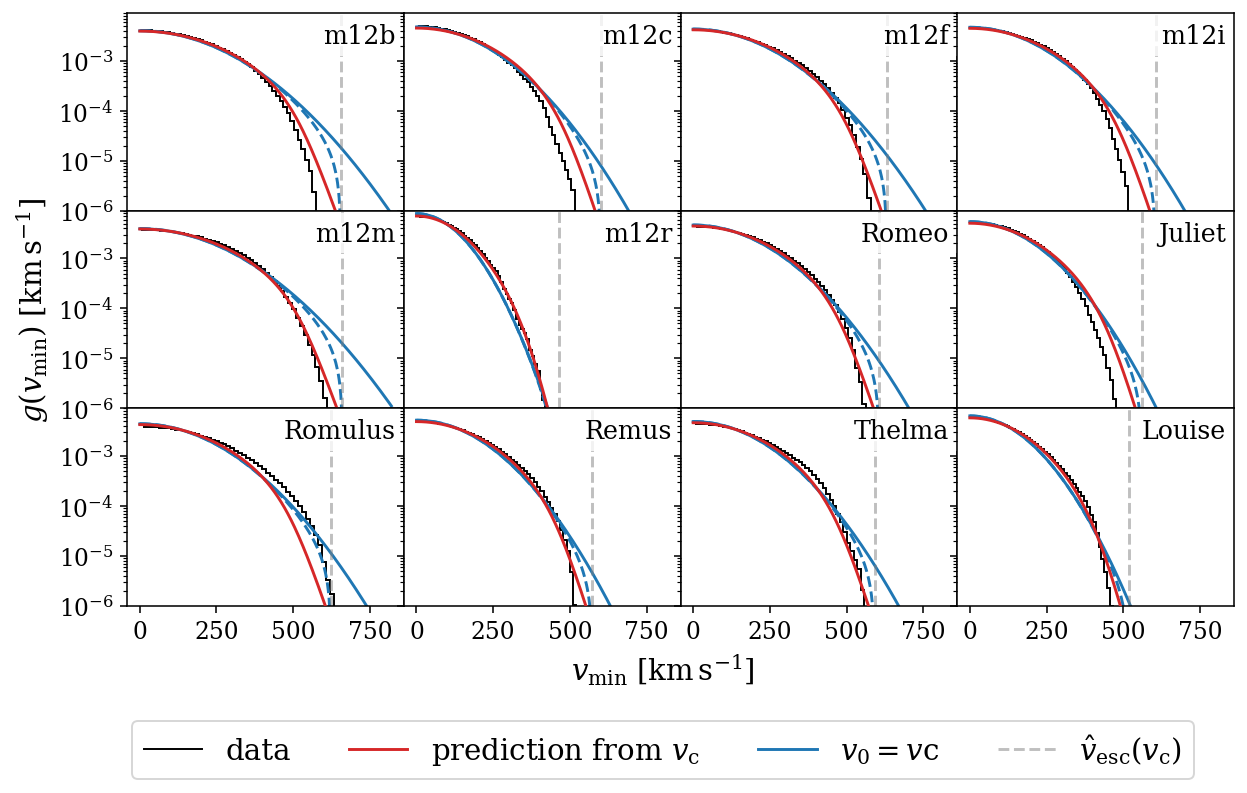

In [197]:
reload(dm_den_viz)
dm_den_viz.plt_halo_integrals('discs', 
                              show_sigmoid_hard=False, 
                              show_max_hard=True,
                              show_vesc=True, ymin=1.e-6,
                              xtickspace=250.,
                              tgt_fname='halo_integrals_all.png')

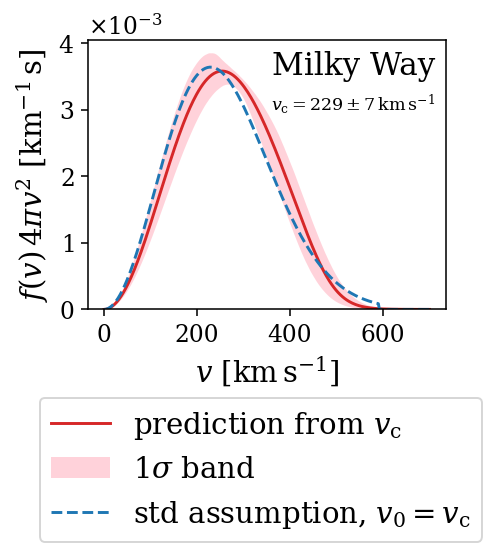

In [210]:
%matplotlib inline
reload(fitting)
reload(dm_den_viz)
dm_den_viz.plt_mw(tgt_fname='distrib_mw.png', dvc=dm_den_viz.dvc_eilers, 
                  dpi=140, show_vcrit=False)

100% |#############################################################################################################################################################################################################|


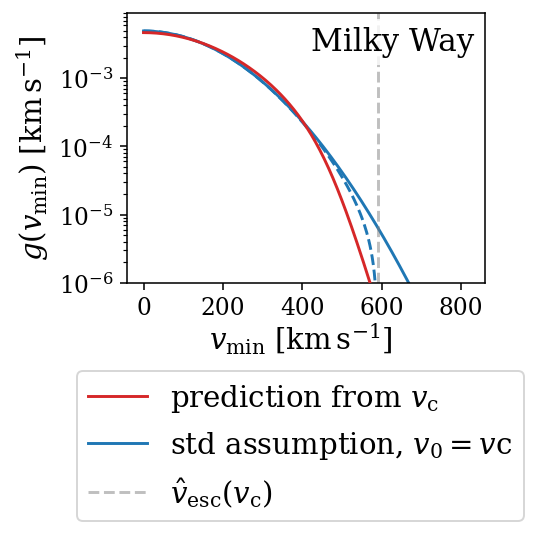

In [211]:
reload(dm_den_viz)
dm_den_viz.plt_halo_integrals(['mw'],
                              tgt_fname='halo_integral_mw.png',
                              show_sigmoid_exp=False,
                              show_sigmoid_hard=False,
                              show_vesc=True, 
                              show_max_hard=True,
                              show_max_exp=False)

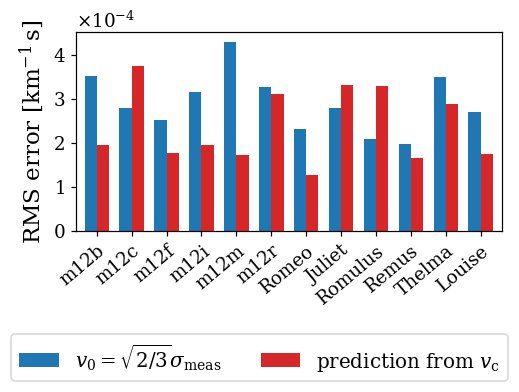

In [13]:
reload(fitting)
fitting.compare_methods(save_fname='rms.png', verbose=False)